PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.


Error processing C:\Users\hesham\OneDrive\سطح المكتب\torgo_data\train\dysarthria_female\F01_Session1_0068.wav: 
Accuracy: 0.9172932330827067


 99%|===================| 1587/1596 [00:21<00:00]        

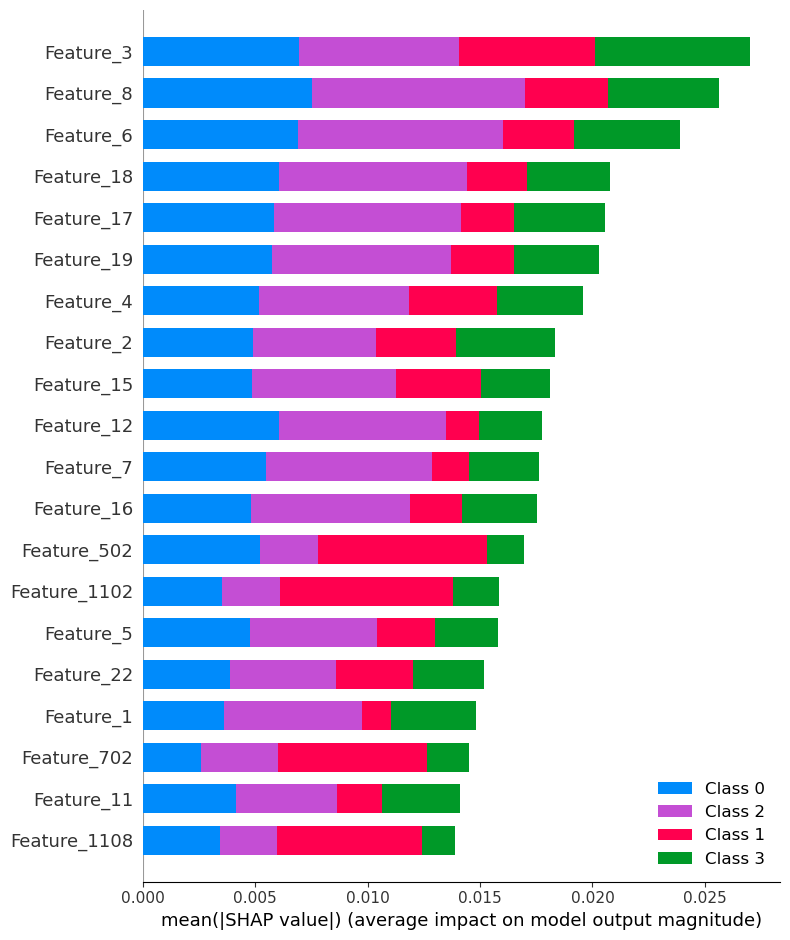

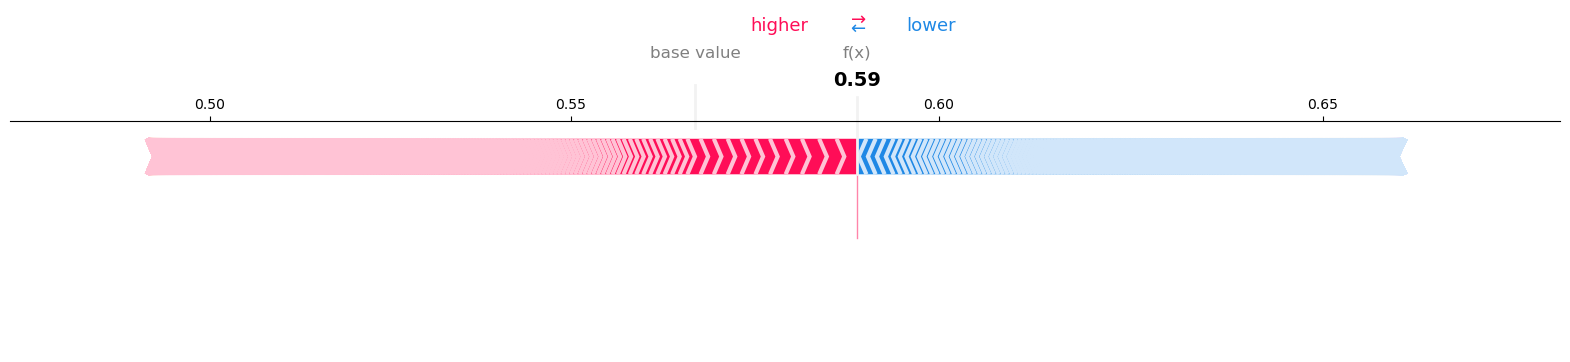

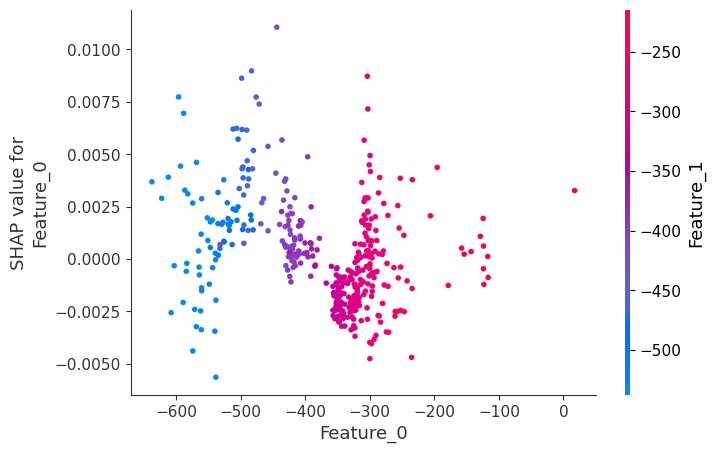

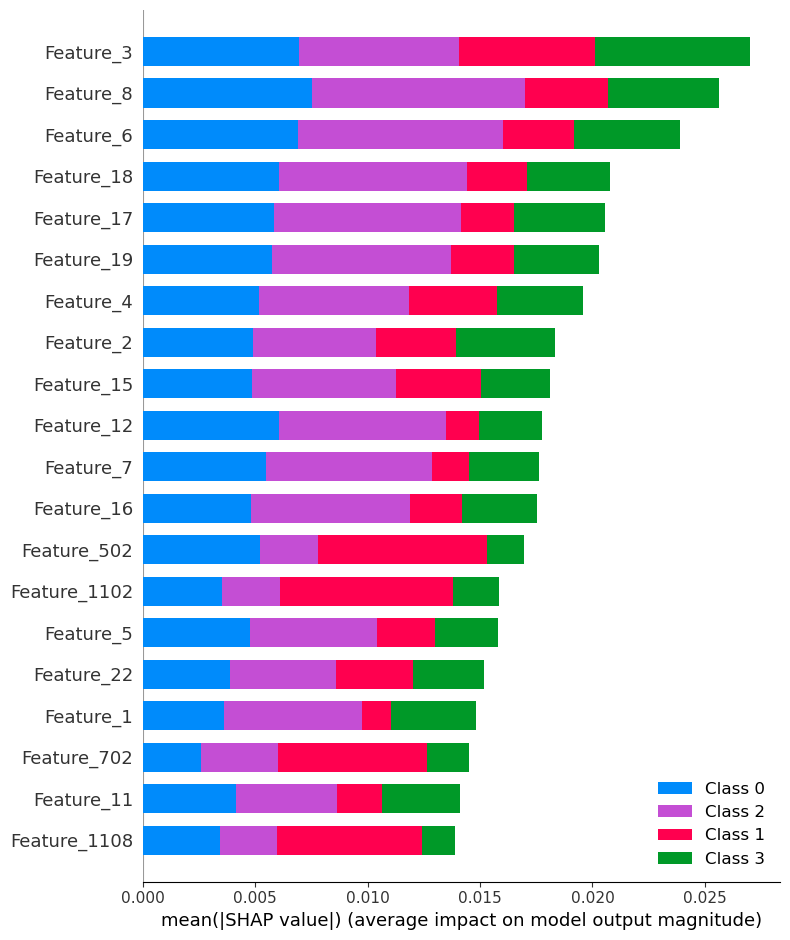

In [18]:
import os
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import librosa

# Function to extract features from audio files
def extract_audio_features(audio_file):
    try:
        # Load audio file
        y, sr = librosa.load(audio_file, sr=None)
        
        # Check if the audio signal is long enough for feature extraction
        if len(y) < 2048:
            return None
        
        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        
        # Pad or truncate the features to ensure they have the same length
        if mfccs.shape[1] < 100:
            pad_width = 100 - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :100]
        
        # Flatten MFCC features
        mfccs_flat = mfccs.ravel()
        
        return mfccs_flat
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None

# Function to load audio data and extract features
def load_data(data_path):
    X, y = [], []
    for label in os.listdir(data_path):
        label_dir = os.path.join(data_path, label)
        for file in os.listdir(label_dir):
            audio_file = os.path.join(label_dir, file)
            features = extract_audio_features(audio_file)
            if features is not None:
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

# Define data path
data_path = r"C:\Users\hesham\OneDrive\سطح المكتب\torgo_data\train"

X, y = load_data(data_path)

# Define class labels
class_labels = ['dysarthria_female', 'dysarthria_male', 'non_dysarthria_female', 'non_dysarthria_male']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train your machine learning model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Explain the model predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=[f"Feature_{i}" for i in range(X.shape[1])])

# Force Plot
sample_idx = 0  # Choose a sample index for force plot visualization
shap.force_plot(explainer.expected_value[0], shap_values[0][sample_idx], X_test[sample_idx], matplotlib=True, feature_names=[f"Feature_{i}" for i in range(X.shape[1])], link='logit')

# Dependency Plot
shap.dependence_plot("Feature_0", shap_values[0], X_test, feature_names=[f"Feature_{i}" for i in range(X.shape[1])])



PySoundFile failed. Trying audioread instead.
librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.


Error processing C:\Users\hesham\OneDrive\سطح المكتب\torgo_data\train\dysarthria_female\F01_Session1_0068.wav: 
Accuracy: 0.9122807017543859


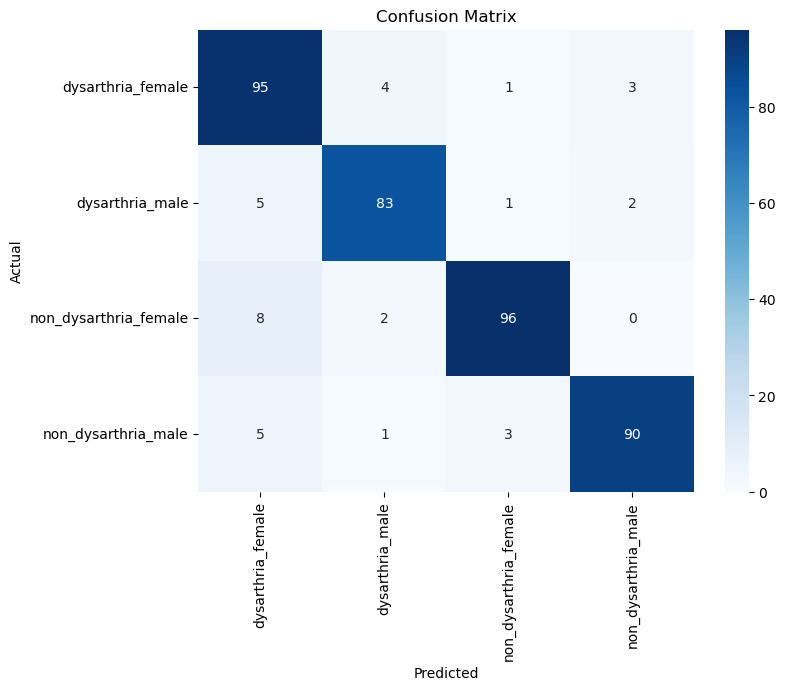

Precision: 0.914930053904611
Recall: 0.9122807017543859
F-score: 0.9128694888986626
MCC: 0.883430037329931


In [28]:
import os
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef
import librosa
import seaborn as sns

# Function to extract features from audio files
def extract_audio_features(audio_file):
    try:
        # Load audio file
        y, sr = librosa.load(audio_file, sr=None)
        
        # Check if the audio signal is long enough for feature extraction
        if len(y) < 2048:
            return None
        
        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        
        # Pad or truncate the features to ensure they have the same length
        if mfccs.shape[1] < 100:
            pad_width = 100 - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :100]
        
        # Flatten MFCC features
        mfccs_flat = mfccs.ravel()
        
        return mfccs_flat
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None

# Function to load audio data and extract features
def load_data(data_path):
    X, y = [], []
    for label in os.listdir(data_path):
        label_dir = os.path.join(data_path, label)
        for file in os.listdir(label_dir):
            audio_file = os.path.join(label_dir, file)
            features = extract_audio_features(audio_file)
            if features is not None:
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

# Define data path
data_path = r"C:\Users\hesham\OneDrive\سطح المكتب\torgo_data\train"

X, y = load_data(data_path)

# Define class labels
class_labels = ['dysarthria_female', 'dysarthria_male', 'non_dysarthria_female', 'non_dysarthria_male']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train your machine learning model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=class_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, F-score, and MCC
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f_score = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)
print("MCC:", mcc)



In [1]:
import numpy as np

# Confusion matrix
confusion_matrix = np.array([[95, 4, 1, 3],
                              [5, 83, 1, 2],
                              [8, 2, 96, 0],
                              [5, 1, 3, 90]])

# Calculate metrics
TP = np.diag(confusion_matrix)
FP = confusion_matrix.sum(axis=0) - TP
FN = confusion_matrix.sum(axis=1) - TP
TN = confusion_matrix.sum() - (TP + FP + FN)

accuracy = np.mean((TP + TN) / (TP + TN + FP + FN))
precision = np.mean(TP / (TP + FP))
recall = np.mean(TP / (TP + FN))
f_score = 2 * precision * recall / (precision + recall)
mcc = np.mean((TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)))

# Print results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-score: {f_score:.2f}')
print(f'MCC: {mcc:.2f}')


Accuracy: 0.96
Precision: 0.92
Recall: 0.91
F-score: 0.91
MCC: 0.88


In [2]:
import numpy as np

# Confusion matrix
confusion_matrix = np.array([[95, 4, 1, 3],
                              [5, 83, 1, 2],
                              [8, 2, 96, 0],
                              [5, 1, 3, 90]])

# Calculate metrics for each class
metrics = {}

for i in range(confusion_matrix.shape[0]):
    TP = confusion_matrix[i, i]
    FP = np.sum(confusion_matrix[:, i]) - TP
    FN = np.sum(confusion_matrix[i, :]) - TP
    TN = np.sum(confusion_matrix) - (TP + FP + FN)
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    recall = TP / (TP + FN) if TP + FN != 0 else 0
    f_score = 2 * precision * recall / (precision + recall) if precision + recall != 0 else 0
    
    metrics[f'Class {i}'] = {'Accuracy': accuracy,
                             'Precision': precision,
                             'Recall': recall,
                             'F-score': f_score}

# Calculate overall metrics
overall_accuracy = np.mean([metrics[class_]['Accuracy'] for class_ in metrics])
overall_precision = np.mean([metrics[class_]['Precision'] for class_ in metrics])
overall_recall = np.mean([metrics[class_]['Recall'] for class_ in metrics])
overall_f_score = np.mean([metrics[class_]['F-score'] for class_ in metrics])
overall_mcc = np.mean([(confusion_matrix[i, i] * np.sum(confusion_matrix) - np.sum(confusion_matrix[:, i]) * np.sum(confusion_matrix[i, :])) / 
                       np.sqrt((confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) * 
                               (np.sum(confusion_matrix) - np.sum(confusion_matrix[:, i])) * (np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]))) 
                       if (confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) * 
                               (np.sum(confusion_matrix) - np.sum(confusion_matrix[:, i])) * (np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :])) != 0 else 0 
                       for i in range(confusion_matrix.shape[0])])

# Print results
print("Class Metrics:")
for class_, metrics_ in metrics.items():
    print(f"{class_}: {metrics_}")

print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Precision: {overall_precision:.2f}')
print(f'Overall Recall: {overall_recall:.2f}')
print(f'Overall F-score: {overall_f_score:.2f}')
print(f'Overall MCC: {overall_mcc:.2f}')


Class Metrics:
Class 0: {'Accuracy': 0.9348370927318296, 'Precision': 0.8407079646017699, 'Recall': 0.9223300970873787, 'F-score': 0.8796296296296297}
Class 1: {'Accuracy': 0.9624060150375939, 'Precision': 0.9222222222222223, 'Recall': 0.9120879120879121, 'F-score': 0.9171270718232044}
Class 2: {'Accuracy': 0.9624060150375939, 'Precision': 0.9504950495049505, 'Recall': 0.9056603773584906, 'F-score': 0.927536231884058}
Class 3: {'Accuracy': 0.9649122807017544, 'Precision': 0.9473684210526315, 'Recall': 0.9090909090909091, 'F-score': 0.9278350515463918}
Overall Accuracy: 0.96
Overall Precision: 0.92
Overall Recall: 0.91
Overall F-score: 0.91
Overall MCC: nan


C:\Users\hesham\AppData\Local\Temp\ipykernel_14916\4044210399.py:36: RuntimeWarning: overflow encountered in long_scalars
  if (confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) *
C:\Users\hesham\AppData\Local\Temp\ipykernel_14916\4044210399.py:34: RuntimeWarning: overflow encountered in long_scalars
  np.sqrt((confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) *
C:\Users\hesham\AppData\Local\Temp\ipykernel_14916\4044210399.py:34: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt((confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) *


In [3]:
import numpy as np

# Confusion matrix
confusion_matrix = np.array([[93, 5, 1, 4],
                              [2, 86, 2, 1],
                              [5, 0, 101, 0],
                              [4, 1, 7, 87]])

# Calculate metrics for each class
metrics = {}

for i in range(confusion_matrix.shape[0]):
    TP = confusion_matrix[i, i]
    FP = np.sum(confusion_matrix[:, i]) - TP
    FN = np.sum(confusion_matrix[i, :]) - TP
    TN = np.sum(confusion_matrix) - (TP + FP + FN)
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    recall = TP / (TP + FN) if TP + FN != 0 else 0
    f_score = 2 * precision * recall / (precision + recall) if precision + recall != 0 else 0
    
    metrics[f'Class {i}'] = {'Accuracy': accuracy,
                             'Precision': precision,
                             'Recall': recall,
                             'F-score': f_score}

# Calculate overall metrics
overall_accuracy = np.mean([metrics[class_]['Accuracy'] for class_ in metrics])
overall_precision = np.mean([metrics[class_]['Precision'] for class_ in metrics])
overall_recall = np.mean([metrics[class_]['Recall'] for class_ in metrics])
overall_f_score = np.mean([metrics[class_]['F-score'] for class_ in metrics])
overall_mcc = np.mean([(confusion_matrix[i, i] * np.sum(confusion_matrix) - np.sum(confusion_matrix[:, i]) * np.sum(confusion_matrix[i, :])) / 
                       np.sqrt((confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) * 
                               (np.sum(confusion_matrix) - np.sum(confusion_matrix[:, i])) * (np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]))) 
                       if (confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) * 
                               (np.sum(confusion_matrix) - np.sum(confusion_matrix[:, i])) * (np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :])) != 0 else 0 
                       for i in range(confusion_matrix.shape[0])])

# Print results
print("Class Metrics:")
for class_, metrics_ in metrics.items():
    print(f"{class_}: {metrics_}")

print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Precision: {overall_precision:.2f}')
print(f'Overall Recall: {overall_recall:.2f}')
print(f'Overall F-score: {overall_f_score:.2f}')
print(f'Overall MCC: {overall_mcc:.2f}')


Class Metrics:
Class 0: {'Accuracy': 0.9473684210526315, 'Precision': 0.8942307692307693, 'Recall': 0.9029126213592233, 'F-score': 0.8985507246376813}
Class 1: {'Accuracy': 0.9724310776942355, 'Precision': 0.9347826086956522, 'Recall': 0.945054945054945, 'F-score': 0.9398907103825138}
Class 2: {'Accuracy': 0.9624060150375939, 'Precision': 0.9099099099099099, 'Recall': 0.9528301886792453, 'F-score': 0.9308755760368664}
Class 3: {'Accuracy': 0.9573934837092731, 'Precision': 0.9456521739130435, 'Recall': 0.8787878787878788, 'F-score': 0.9109947643979057}
Overall Accuracy: 0.96
Overall Precision: 0.92
Overall Recall: 0.92
Overall F-score: 0.92
Overall MCC: nan


C:\Users\hesham\AppData\Local\Temp\ipykernel_14916\1858125405.py:36: RuntimeWarning: overflow encountered in long_scalars
  if (confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) *
C:\Users\hesham\AppData\Local\Temp\ipykernel_14916\1858125405.py:34: RuntimeWarning: overflow encountered in long_scalars
  np.sqrt((confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) *
C:\Users\hesham\AppData\Local\Temp\ipykernel_14916\1858125405.py:34: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt((confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) *


In [5]:
import numpy as np

# Confusion matrix
confusion_matrix = np.array([[100, 0, 0, 0],
                              [0, 100, 0, 0],
                              [0, 0, 100, 0],
                              [0, 0, 0, 100]])

# Calculate metrics for each class
metrics = {}

for i in range(confusion_matrix.shape[0]):
    TP = confusion_matrix[i, i]
    FP = np.sum(confusion_matrix[:, i]) - TP
    FN = np.sum(confusion_matrix[i, :]) - TP
    TN = np.sum(confusion_matrix) - (TP + FP + FN)
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    recall = TP / (TP + FN) if TP + FN != 0 else 0
    f_score = 2 * precision * recall / (precision + recall) if precision + recall != 0 else 0
    
    metrics[f'Class {i}'] = {'Accuracy': accuracy,
                             'Precision': precision,
                             'Recall': recall,
                             'F-score': f_score}

# Calculate overall metrics
overall_accuracy = np.mean([metrics[class_]['Accuracy'] for class_ in metrics])
overall_precision = np.mean([metrics[class_]['Precision'] for class_ in metrics])
overall_recall = np.mean([metrics[class_]['Recall'] for class_ in metrics])
overall_f_score = np.mean([metrics[class_]['F-score'] for class_ in metrics])
overall_mcc = np.mean([(confusion_matrix[i, i] * np.sum(confusion_matrix) - np.sum(confusion_matrix[:, i]) * np.sum(confusion_matrix[i, :])) / 
                       np.sqrt((confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) * 
                               (np.sum(confusion_matrix) - np.sum(confusion_matrix[:, i])) * (np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]))) 
                       if (confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) * 
                               (np.sum(confusion_matrix) - np.sum(confusion_matrix[:, i])) * (np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :])) != 0 else 0 
                       for i in range(confusion_matrix.shape[0])])

# Print results
print("Class Metrics:")
for class_, metrics_ in metrics.items():
    print(f"{class_}: {metrics_}")

print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Precision: {overall_precision:.2f}')
print(f'Overall Recall: {overall_recall:.2f}')
print(f'Overall F-score: {overall_f_score:.2f}')
print(f'Overall MCC: {overall_mcc:.2f}')


Class Metrics:
Class 0: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F-score': 1.0}
Class 1: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F-score': 1.0}
Class 2: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F-score': 1.0}
Class 3: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F-score': 1.0}
Overall Accuracy: 1.00
Overall Precision: 1.00
Overall Recall: 1.00
Overall F-score: 1.00
Overall MCC: nan


C:\Users\hesham\AppData\Local\Temp\ipykernel_14916\3958389151.py:36: RuntimeWarning: overflow encountered in long_scalars
  if (confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) *
C:\Users\hesham\AppData\Local\Temp\ipykernel_14916\3958389151.py:34: RuntimeWarning: overflow encountered in long_scalars
  np.sqrt((confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) *
C:\Users\hesham\AppData\Local\Temp\ipykernel_14916\3958389151.py:34: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt((confusion_matrix[i, i] + np.sum(confusion_matrix[:, i])) * (confusion_matrix[i, i] + np.sum(confusion_matrix[i, :])) *
